In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import folium

from folium import plugins
from folium.plugins import HeatMap

from matplotlib import font_manager

font_dir = ['C:/Users/anton_zwjvzg0/Documents/506Stuff/project/GTAmerica Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_dir = ['C:/Users/anton_zwjvzg0/Documents/506Stuff/project/GTAmerica Font Bold']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'GT America'

In [3]:
df = pd.read_csv('employee-earnings-report-2021.csv', encoding = "ISO-8859-1")
df_2020 = pd.read_csv('city-of-boston-calendar-year-2020-earnings.csv', encoding = "ISO-8859-1")
df_2019 = pd.read_csv('allemployeescy2019_feb19_20final-all.csv', encoding = "ISO-8859-1")
df_2018 = pd.read_csv('employeeearningscy18full.csv', encoding = "ISO-8859-1")
#initial data
df_2020

nan_name_with_gross = df_2020[df_2020['NAME'].isnull()]

nan_name_with_gross

nan_name_with_gross = df[df['NAME'].isnull()]

nan_name_with_gross

#ONLY 2021 HAS NAN RECORDS IN NAMES, SO ONLY HAVE TO CLEAN THAT ONE UP

df_2020

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,"$145,787.56",NaN,"$13,160.94","$124,395.57",NaN,"$45,210.00","$36,447.09","$365,001.16",02186
1,"Lee,Waiman",Boston Police Department,Police Detective,"$108,803.25",NaN,"$16,324.27","$96,126.59",NaN,"$111,688.00","$27,200.78","$360,142.89",02134
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$19,672.83","$155,123.11",NaN,"$5,088.00","$33,175.06","$345,758.44",02136
3,"Danilecki,John H",Boston Police Department,Police Captain,"$162,770.15",NaN,"$24,504.13","$64,326.60","$3,548.13","$43,200.00","$41,579.47","$339,928.48",02081
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$16,723.95","$156,754.23",NaN,NaN,"$33,175.06","$339,352.68",02132
...,...,...,...,...,...,...,...,...,...,...,...,...
21853,"Homan,Paul A",BPS Substitute Teachers/Nurs,Substitute Teacher,$1.52,NaN,NaN,NaN,NaN,NaN,NaN,$1.52,02188
21854,"Lane,Cheryl A",BPS Substitute Teachers/Nurs,Sub Teacher - Retiree,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02346
21855,"Cura,Miguel",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02067
21856,"Nelson,Philip F",BPS Substitute Teachers/Nurs,Substitute Teacher HE,$0.38,NaN,NaN,NaN,NaN,NaN,NaN,$0.38,02132


In [4]:
all_officers_2021 = df[df['TITLE'] == 'Police Officer']
num_officers_2021 = len(all_officers_2021)

all_officers_2020 = df_2020[df_2020['TITLE'] == 'Police Officer']
num_officers_2020 = len(all_officers_2020)

all_officers_2019 = df_2019[df_2019['TITLE'] == 'Police Officer']
num_officers_2019 = len(all_officers_2019)

all_officers_2018 = df_2018[df_2018['TITLE'] == 'Police Officer']
num_officers_2018 = len(all_officers_2018)

all_non_officer_employees_2021 = df[df['TITLE'] != 'Police Officer']
num_non_officer_employees_2021 = len(all_non_officer_employees_2021)

all_non_officer_employees_2020 = df_2020[df_2020['TITLE'] != 'Police Officer']
num_non_officer_employees_2020 = len(all_non_officer_employees_2020)

all_non_officer_employees_2019 = df_2019[df_2019['TITLE'] != 'Police Officer']
num_non_officer_employees_2019 = len(all_non_officer_employees_2019)

all_non_officer_employees_2018 = df_2018[df_2018['TITLE'] != 'Police Officer']
num_non_officer_employees_2018 = len(all_non_officer_employees_2018)

prop_officers_2021 = num_officers_2021/len(df)

prop_officers_2020 = num_officers_2020/len(df_2020)

prop_officers_2019 = num_officers_2019/len(df_2019)

prop_officers_2018 = num_officers_2018/len(df_2018)

prop_non_2021 = num_non_officer_employees_2021/len(df)

prop_non_2020 = num_non_officer_employees_2020/len(df_2020)

prop_non_2019 = num_non_officer_employees_2019/len(df_2019)

prop_non_2018 = num_non_officer_employees_2018/len(df_2018)

In [5]:
fio_21 = pd.read_csv('fio_2021-2.csv', encoding = "ISO-8859-1")
fio_21 = fio_21[fio_21['zip'].notna()]
fio_21 = fio_21[fio_21['zip'] != 0]

In [6]:
def get_first_last(string):
    temp = string.replace(",", "")
    tempsplit = temp.split()
    return tempsplit[1], tempsplit[0]

get_first_last("POLITSOPOULOS, NICHOLAS")

('NICHOLAS', 'POLITSOPOULOS')

In [7]:
fio_21_officers = {}
for index, row in fio_21.iterrows():
    first, last = get_first_last(row['contact_officer_name'])
    if (first, last) in fio_21_officers:
        fio_21_officers[(first, last)] += 1
    else:
        fio_21_officers[(first, last)] = 1

In [8]:
len(fio_21_officers)

660

In [9]:
officers = fio_21.contact_officer_name.tolist()

In [10]:
len(set(officers))

661

In [11]:
def convert_to_normal(name):
    first_let = name[0]
    rest = name[1:].lower()
    return first_let + rest

In [12]:
numfound = 0
officer_pay = []
officer_FIO = []
for officer, num in fio_21_officers.items():
    tempdf = df[(df['NAME'].str.contains(convert_to_normal(officer[0])) == True) & (df['NAME'].str.contains(convert_to_normal(officer[1])) == True)]
    if len(tempdf) != 0:
        officer_pay.append(float(tempdf.iloc[0]['TOTAL_GROSS'].replace(",","")))
        officer_FIO.append(num)
        
print(len(officer_pay))
print(len(officer_FIO))

585
585


In [13]:
officer_pay_overtime = []
officer_FIO_overtime = []
for officer, num in fio_21_officers.items():
    tempdf = df[(df['NAME'].str.contains(convert_to_normal(officer[0])) == True) & (df['NAME'].str.contains(convert_to_normal(officer[1])) == True)]
    if len(tempdf) != 0:
        overt = tempdf.iloc[0]['OVERTIME']
        if type(overt) == str:
            officer_pay_overtime.append(float(overt.replace(",","")))
        else:
            officer_pay_overtime.append(overt)
        officer_FIO_overtime.append(num)
        
print(len(officer_pay))
print(len(officer_FIO))

585
585


In [14]:
print(max(officer_pay))
print(min(officer_FIO))

397444.21
1


Text(0, 0.5, 'Total Gross Pay')

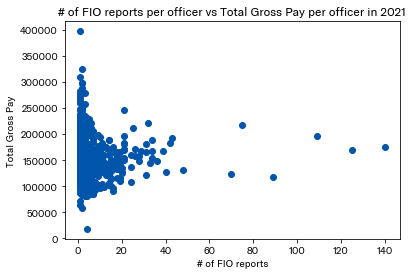

In [15]:
plt.scatter(officer_FIO, officer_pay, color = '#0055aa')
plt.title("# of FIO reports per officer vs Total Gross Pay per officer in 2021")
plt.xlabel("# of FIO reports")
plt.ylabel("Total Gross Pay")

Text(0, 0.5, 'Total Overtime Pay')

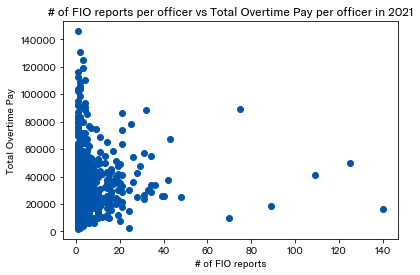

In [16]:
plt.scatter(officer_FIO_overtime, officer_pay_overtime, color = '#0055aa')
plt.title("# of FIO reports per officer vs Total Overtime Pay per officer in 2021")
plt.xlabel("# of FIO reports")
plt.ylabel("Total Overtime Pay")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


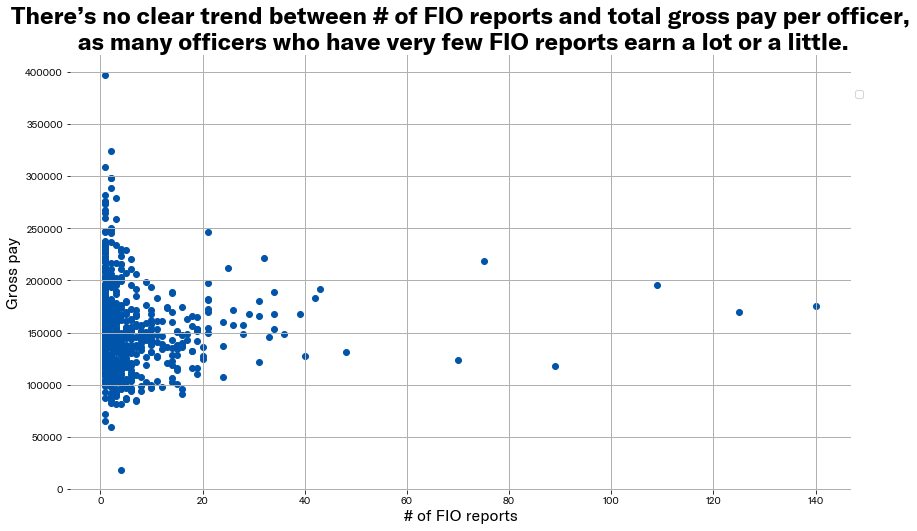

In [17]:
#X_axis = np.arange(len(X))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

#plt.xticks(fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#csfont = {'fontname':'Century Schoolbook'}
  
#plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

#ax.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#ax.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

ax.scatter(officer_FIO, officer_pay, color = '#0055aa')

plt.grid(linewidth = 1)
plt.title("There’s no clear trend between # of FIO reports and total gross pay per officer,\n as many officers who have very few FIO reports earn a lot or a little.", fontweight="bold", fontsize = 24)
#plt.legend(loc='upper center')
#plt.xticks(X_axis, X)
plt.ylabel('Gross pay', fontsize = 16)
plt.xlabel("# of FIO reports", fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


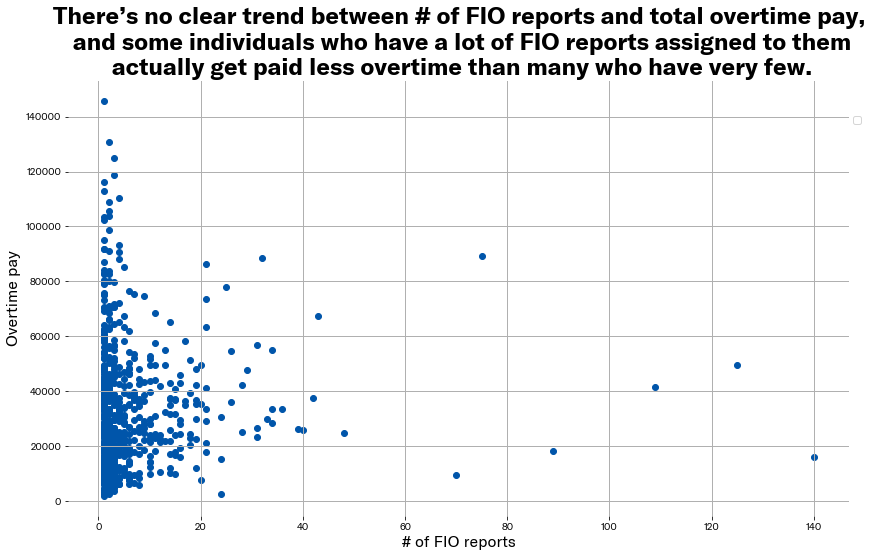

In [18]:
#X_axis = np.arange(len(X))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

#plt.xticks(fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#csfont = {'fontname':'Century Schoolbook'}
  
#plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

#ax.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#ax.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

ax.scatter(officer_FIO_overtime, officer_pay_overtime, color = '#0055aa')

plt.grid(linewidth = 1)
plt.title("There’s no clear trend between # of FIO reports and total overtime pay,\n and some individuals who have a lot of FIO reports assigned to them\n actually get paid less overtime than many who have very few.", fontweight="bold", fontsize = 24)
#plt.legend(loc='upper center')
#plt.xticks(X_axis, X)
plt.ylabel('Overtime pay', fontsize = 16)
plt.xlabel("# of FIO reports", fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
plt.show()

In [19]:
x = df[df['TOTAL_GROSS'] == '397,444.21']
x

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301


In [20]:
def convtostr(row):
    try:
        curzip = str(row['zip'])
        if len(curzip) == 0:
            return '00000'
        elif len(curzip) == 1:
            return '0000' + curzip
        elif len(curzip) == 2:
            return '000' + curzip
        elif len(curzip) == 3:
            return '00' + curzip
        elif len(curzip) == 4:
            return '0' + curzip
        else:
            return curzip
    except:
        return None

fio_21['POSTAL'] = fio_21.apply(convtostr, axis = 1)

In [21]:
def convert_to_float(row):
    if pd.isna(row['TOTAL_GROSS']):
        return 0
    string = row['TOTAL_GROSS']
    if type(string) == float:
        return string
    else:
        return float(string.replace(",",""))
    
all_officers_2021['TOTAL_GROSS_FLOAT'] = all_officers_2021.apply(convert_to_float, axis = 1)

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_14424/1804217324.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_officers_2021['TOTAL_GROSS_FLOAT'] = all_officers_2021.apply(convert_to_float, axis = 1)


In [35]:
def convert_to_float_over(row):
    if pd.isna(row['OVERTIME']):
        return 0
    string = row['OVERTIME']
    if type(string) == float:
        return string
    else:
        return float(string.replace(",",""))

all_officers_2021['OVERTIME_FLOAT'] = all_officers_2021.apply(convert_to_float_over, axis = 1)
#df['OVERTIME_FLOAT'] = df.apply(convert_to_float_over, axis = 1)

C:\Users\ANTON_~1\AppData\Local\Temp/ipykernel_14424/2880495098.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_officers_2021['OVERTIME_FLOAT'] = all_officers_2021.apply(convert_to_float_over, axis = 1)


In [23]:
df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL,OVERTIME_FLOAT
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119,0.00
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129,0.00
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130,82300.87
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368,67849.66
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301,75938.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
22548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
22549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
22550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [24]:
zipcode_total_ov = {}
for index, row in fio_21.iterrows():
    officer = get_first_last(row['contact_officer_name'])
    tempdf = df[(df['NAME'].str.contains(convert_to_normal(officer[0])) == True) & (df['NAME'].str.contains(convert_to_normal(officer[1])) == True)]
    if len(tempdf) != 0:
        cursal = tempdf.iloc[0]['OVERTIME_FLOAT']
        if row['POSTAL'] not in zipcode_total_ov:
            zipcode_total_ov[row['POSTAL']] = [cursal, 1, {officer}]
        else:
            zipcode_total_ov[row['POSTAL']][1] += 1
            if officer not in zipcode_total_ov[row['POSTAL']][2]:
                zipcode_total_ov[row['POSTAL']][0] += cursal
                zipcode_total_ov[row['POSTAL']][2].add(officer)
                
lis_ov = []

In [25]:
for zipc, sal in zipcode_total_ov.items():
    lis_ov.append((zipc, sal[0]/len(sal[2]), sal[1]))

lis_ov.sort(key = lambda x: x[2])    

print(lis_ov[-10:])

[('02115', 29005.803272727266, 117), ('02126', 37232.02552238806, 137), ('02130', 30037.472553191492, 157), ('02122', 28984.587230769226, 214), ('02116', 31198.78352272728, 230), ('02125', 38323.011810344826, 294), ('02121', 35604.49586206895, 330), ('02119', 36010.087839999986, 347), ('02124', 29591.663181818167, 398), ('02118', 33057.47749999999, 708)]


In [26]:
print(lis_ov[-10:])

[('02115', 29005.803272727266, 117), ('02126', 37232.02552238806, 137), ('02130', 30037.472553191492, 157), ('02122', 28984.587230769226, 214), ('02116', 31198.78352272728, 230), ('02125', 38323.011810344826, 294), ('02121', 35604.49586206895, 330), ('02119', 36010.087839999986, 347), ('02124', 29591.663181818167, 398), ('02118', 33057.47749999999, 708)]


In [27]:
top10FIOavgov = []
top10FIOzipov = []
top10FIOnumov = []

for item in lis_ov[-10:]:
    top10FIOavgov.append(item[1])
    top10FIOzipov.append(item[0])
    top10FIOnumov = [item[2]]

In [28]:
zipcode_total = {}
for index, row in fio_21.iterrows():
    officer = get_first_last(row['contact_officer_name'])
    tempdf = df[(df['NAME'].str.contains(convert_to_normal(officer[0])) == True) & (df['NAME'].str.contains(convert_to_normal(officer[1])) == True)]
    if len(tempdf) != 0:
        cursal = float(tempdf.iloc[0]['TOTAL_GROSS'].replace(",",""))
        if row['POSTAL'] not in zipcode_total:
            zipcode_total[row['POSTAL']] = [cursal, 1, {officer}]
        else:
            zipcode_total[row['POSTAL']][1] += 1
            if officer not in zipcode_total[row['POSTAL']][2]:
                zipcode_total[row['POSTAL']][0] += cursal
                zipcode_total[row['POSTAL']][2].add(officer)

lis = []            


            
"""
lis = []
for key, val in zipcode_total.items():
    lis.append([key, val[0], val[1]])
    
lis.sort(key = lambda x: x[2])

print(lis[-10:])

top10FIOavgsal = []
top10FIOzip = []

for item in lis[-10:]:
    top10FIOavgsal.append(item[1])
    top10FIOzip.append(item[0])
    
#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

X_axis = np.arange(10)

plt.bar(X_axis, top10FIOavgsal, 0.4, label = 'Zip Code', color = '#0055aa')

plt.xticks(X_axis, top10FIOzip)
plt.xlabel("Zip Code")
plt.ylabel("Average total gross salary of officers")
plt.title("Average total gross salaries of zip codes with top 10 most reported # of FIOs")
plt.legend(loc='upper center')
plt.show()"""

'\nlis = []\nfor key, val in zipcode_total.items():\n    lis.append([key, val[0], val[1]])\n    \nlis.sort(key = lambda x: x[2])\n\nprint(lis[-10:])\n\ntop10FIOavgsal = []\ntop10FIOzip = []\n\nfor item in lis[-10:]:\n    top10FIOavgsal.append(item[1])\n    top10FIOzip.append(item[0])\n    \n#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]\n\nX_axis = np.arange(10)\n\nplt.bar(X_axis, top10FIOavgsal, 0.4, label = \'Zip Code\', color = \'#0055aa\')\n\nplt.xticks(X_axis, top10FIOzip)\nplt.xlabel("Zip Code")\nplt.ylabel("Average total gross salary of officers")\nplt.title("Average total gross salaries of zip codes with top 10 most reported # of FIOs")\nplt.legend(loc=\'upper center\')\nplt.show()'

In [29]:
for zipc, sal in zipcode_total.items():
    lis.append((zipc, sal[0]/len(sal[2]), sal[1]))

lis.sort(key = lambda x: x[2])    

print(lis[-10:])

[('02115', 142042.56636363638, 117), ('02126', 155980.88671641782, 137), ('02130', 149304.71127659577, 157), ('02122', 148989.58138461536, 214), ('02116', 144437.4811363636, 230), ('02125', 153463.5806034483, 294), ('02121', 154154.013362069, 330), ('02119', 150873.71992, 347), ('02124', 144986.47257575757, 398), ('02118', 145687.9095833333, 708)]


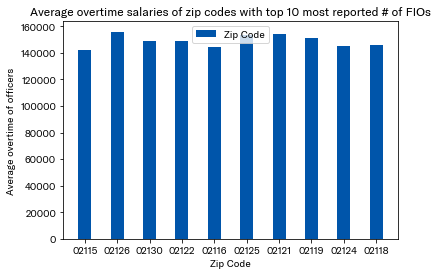

In [30]:
top10FIOavg = []
top10FIOzip = []
top10FIOnum = []

for item in lis[-10:]:
    top10FIOavg.append(item[1])
    top10FIOzip.append(item[0])
    top10FIOnum = [item[2]]
    
#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

X_axis = np.arange(10)

plt.bar(X_axis, top10FIOavg, 0.4, label = 'Zip Code', color = '#0055aa')

plt.xticks(X_axis, top10FIOzip)
plt.xlabel("Zip Code")
plt.ylabel("Average overtime of officers")
plt.title("Average overtime salaries of zip codes with top 10 most reported # of FIOs")
plt.legend(loc='upper center')
plt.show()

In [31]:
top10FIOavgov

[29005.803272727266,
 37232.02552238806,
 30037.472553191492,
 28984.587230769226,
 31198.78352272728,
 38323.011810344826,
 35604.49586206895,
 36010.087839999986,
 29591.663181818167,
 33057.47749999999]

In [32]:
actualov = []
for i in range(len(top10FIOavg)):
    actualov.append(top10FIOavg[i] - top10FIOavgov[i])

In [36]:
all_officers_2021_avg_ov = all_officers_2021['OVERTIME_FLOAT'].mean()
all_officers_2021_avg_tot = all_officers_2021['TOTAL_GROSS_FLOAT'].mean()
print(all_officers_2021_avg_ov)
print(all_officers_2021_avg_tot)

22768.436881150643
133232.19042392125


In [37]:
del top10FIOzip[10]

IndexError: list assignment index out of range

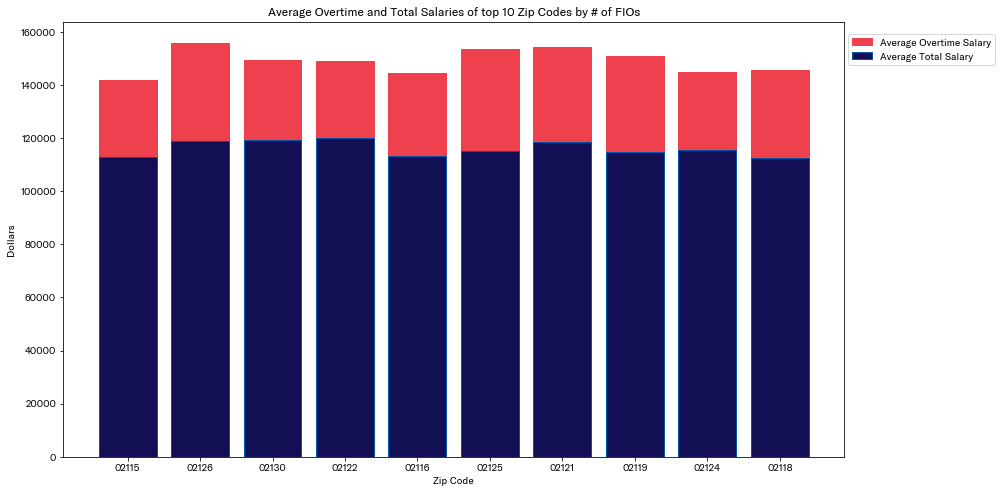

In [38]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

ax.bar(X_axis, top10FIOavg, color='#EF404E', edgecolor='#EF404E',label='Average Overtime Salary')
ax.bar(X_axis, actualov, color='#130F54', edgecolor='#0055aa',label='Average Total Salary')



plt.title('Average Overtime and Total Salaries of top 10 Zip Codes by # of FIOs')
plt.xlabel('Zip Code')
plt.ylabel('Dollars')
plt.xticks(X_axis, top10FIOzip)
leg = ax.legend(loc=(1.005, .9));
fig.savefig('Total_BPD_Budget.png', bbox_inches='tight')

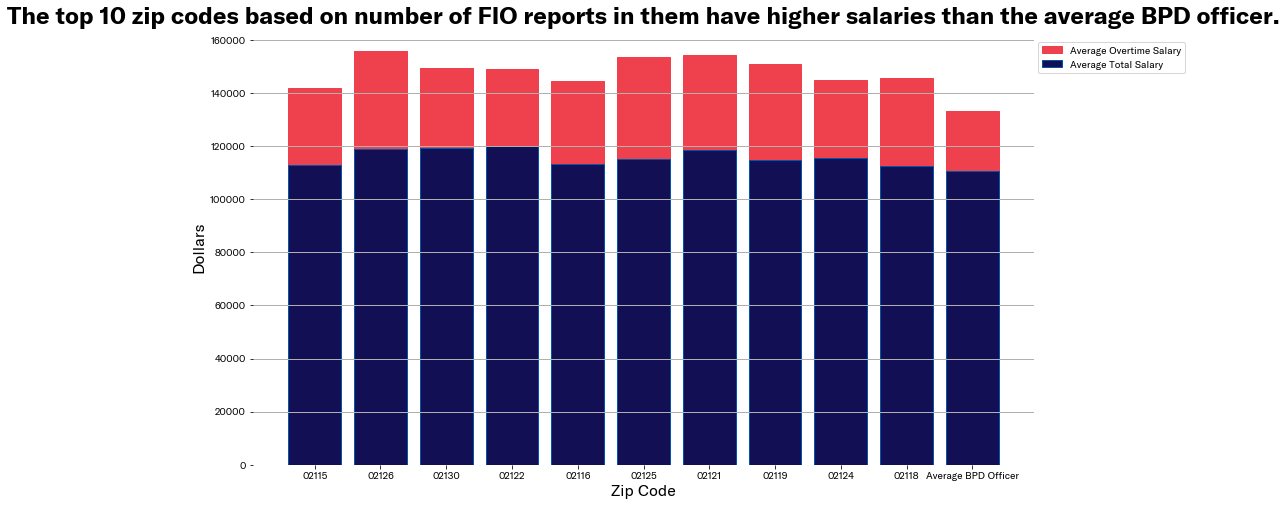

In [39]:
top10FIOavg.append(all_officers_2021_avg_tot)
actualov.append(all_officers_2021_avg_tot - all_officers_2021_avg_ov)
top10FIOzip.append('Average BPD Officer')
X_axis = np.arange(11)

#X_axis = np.arange(len(X))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

#plt.xticks(fontsize = 12)



#csfont = {'fontname':'Century Schoolbook'}
  
#plt.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#plt.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa')

#ax.bar(X_axis - 0.2, num_officers_per_year, 0.4, label = 'Police Officers', color = '#ef404d')
#ax.bar(X_axis + 0.2, num_other_employees_per_year, 0.4, label = 'Other Boston Employees', color = '#0055aa'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.bar(X_axis, top10FIOavg, color='#EF404E', edgecolor='#EF404E',label='Average Overtime Salary')
ax.bar(X_axis, actualov, color='#130F54', edgecolor='#0055aa',label='Average Total Salary')


plt.grid(axis = 'y', linewidth = 1)
plt.title('The top 10 zip codes based on number of FIO reports in them have higher salaries than the average BPD officer.', fontweight="bold", fontsize = 24)
plt.ylabel('Dollars', fontsize = 16)
plt.xlabel('Zip Code', fontsize = 16)
plt.xticks(X_axis, top10FIOzip)
leg = ax.legend(loc=(1.005, .9));
fig.savefig('Total_BPD_Budget.png', bbox_inches='tight')

[['02127', 131502.38032258063, 113], ['02126', 147064.57777777777, 158], ['02130', 139767.43777777778, 165], ['02122', 130342.68902654867, 227], ['02116', 36067.87, 271], ['02125', 121917.64976190476, 332], ['02121', 126843.57350000001, 390], ['02119', 127495.87550000001, 427], ['02124', 138738.0343939394, 460], ['02118', 100511.8775, 843]]


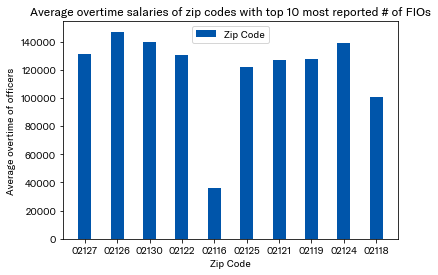

In [44]:
zipcode_total_ov = {}
for index, row in fio_21.iterrows():
    if row['POSTAL'] not in zipcode_total_ov:
        temp_df = all_officers_2021[all_officers_2021['POSTAL'] == row['POSTAL']]
        temp_df = temp_df[temp_df['OVERTIME'].notna()]
        if len(temp_df) == 0:
            continue
        totalsum = temp_df['OVERTIME_FLOAT'].sum()
        #print(totalsum)
        zipcode_total_ov[row['POSTAL']] = [totalsum, 1]
        zipcode_total_ov[row['POSTAL']][0] /= len(temp_df)
    else:
        zipcode_total_ov[row['POSTAL']][1] += 1

        
lis = []
for key, val in zipcode_total_ov.items():
    lis.append([key, val[0], val[1]])
    
lis.sort(key = lambda x: x[2])

print(lis[-10:])

top10FIOavgover = []
top10FIOzipov = []

for item in lis[-10:]:
    top10FIOavgover.append(item[1])
    top10FIOzipov.append(item[0])
    
#police_per_10k_list = [police_per_10k_2018,police_per_10k_2019,police_per_10k_2020,police_per_10k_2021]

X_axis = np.arange(10)

plt.bar(X_axis, top10FIOavgover, 0.4, label = 'Zip Code', color = '#0055aa')

plt.xticks(X_axis, top10FIOzipov)
plt.xlabel("Zip Code")
plt.ylabel("Average overtime of officers")
plt.title("Average overtime salaries of zip codes with top 10 most reported # of FIOs")
plt.legend(loc='upper center')
plt.show()